In [27]:
# Imports
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns

SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 30

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('font', **{'family': 'serif', 'serif': ['Times New Roman']})
# plt.rc('text', usetex=True)

CWD = pathlib.Path("").parent

In [28]:
# Load the dataset
df = pd.read_excel(CWD / 'data' / 'AI-Generated Reading Assessment Reports (Responses).xlsx')
df.head()

,Timestamp,"As an initial overview of the report, we provide keywords regarding classroom-wide performance and behaviors on the assessment. Is the status report helpful?",Why did you rate the previous section as such?,"To start a deeper dive into the report, we provide a summary regarding students' performance on the assignment. Is the report's summary helpful?",Why did you rate the previous section as such?.1,The next step is discussing the content within the assessment and how learning outcomes relate to reading standards and skills. We provide 2 sections linking evidence from the assessment to specific teaching standards and skills. Are these two sections helpful?,Why did you rate the previous section as such?.2,Students' gaze data was clustered together to create reader behavior profiles. These are interpreted and described by an LLM to make it easier to understand how to support these students instead of looking at heatmaps and tables of data. Is this cluster section helpful?,Why did you rate the previous section as such?.3,"Moreover, we present outlier students in terms of their learning outcomes and behaviors, both in terms of high and low-performing students. Is this outlier section helpful?",Why did you rate the previous section as such?.4,"We conclude the report by listing out recommendations in terms of possible changes, instructional methods, and exercises to help students based on the collected data. Is this recommendations section helpful?",Why did you rate the previous section as such?.5,What are your overall impressions of the system-generated reports?,"Were there any insights that felt particularly helpful or actionable? If so, which ones and why?","Were there any insights that felt particularly helpful or actionable? If so, which ones and why?.1","Did any parts of the report seem unclear or difficult to interpret? If so, what improvements would help?","Did any parts of the report seem unclear or difficult to interpret? If so, what improvements would help?.1",Are there any additional types of insights or data you wish were included in the reports?,Is there anything else you'd like to share about your experience using this system?
0,2025-02-16 19:15:02.259,5,This is information I want and need to know.,5,It's helpful to know where there is room for g...,5,It's equally important for me to know where st...,5,"I love the specificity of this report, especia...",5,"Again, knowing the outliers allows me to quick...",5,"Yes, I love having suggestions on how to move ...",It feels like we finally are utilizing technol...,I truly liked knowing about the outliers inste...,I truly liked knowing about the outliers inste...,Nope!,Nope!,None that I can think of at this time.,This is a game - changer.
1,2025-02-17 04:49:20.137,3,"""good"" is a subjective word - ""grade-level"", ""...",2,too wordy; consider bullet points with a brief...,3,Consider annotation to make this more accessib...,3,As above section: italics the action step in e...,5,succinct; data driven for future follow up of ...,2,#2 recommendation is too vague and moot; teach...,"As a classroom teacher, for my own needs (not ...",Recommendations; Cluster breakdown of students,same as above,annotations - see individual notes for suggest...,above,"more recommendations - ""yes, but how"" types of...",helpful
2,2025-02-17 13:38:19.327,3,I think here percentages would be helpful. It'...,3,"This information is very helpful, BUT I would ...",2,"This information is VERY helpful, but I am a b...",4,I like this one! I think that it should go Clu...,3,The struggling outliers and the exceptional ou...,3,I dont think that the final sentence needs to ...,This provides very helpful feedback on how stu...,What was most helpful was the student cluster ...,The information in the content and skills sect...,"As a whole, the report would benefit from diff...","As a teacher, I don't know how much I would us...",I would suggest having hyperlinks in the recom...,Not at this time.
3,2025-02

In [29]:
# Compute the average scores based on the Likert Scale
# It should be every other columm, starting from the 1st column and ending on the 11th (in a 0-based index)
# likert_scores = df.iloc[:, 1::2].mean(axis=1)
likert_scores = df.iloc[:, 1::2].iloc[:, :6]
likert_scores

# Rename columns to the following: "status", "summary", "content and skills", "clusters", "outliers", "recommendations"
likert_scores.columns = ["Status", "Summary", "Content & Skills", "Clusters", "Outliers", "Recommendations"]
likert_scores

,Status,Summary,Content & Skills,Clusters,Outliers,Recommendations
0,5,5,5,5,5,5
1,3,2,3,3,5,2
2,3,3,2,4,3,3
3,2,3,5,4,3,3
4,3,5,4,5,3,3


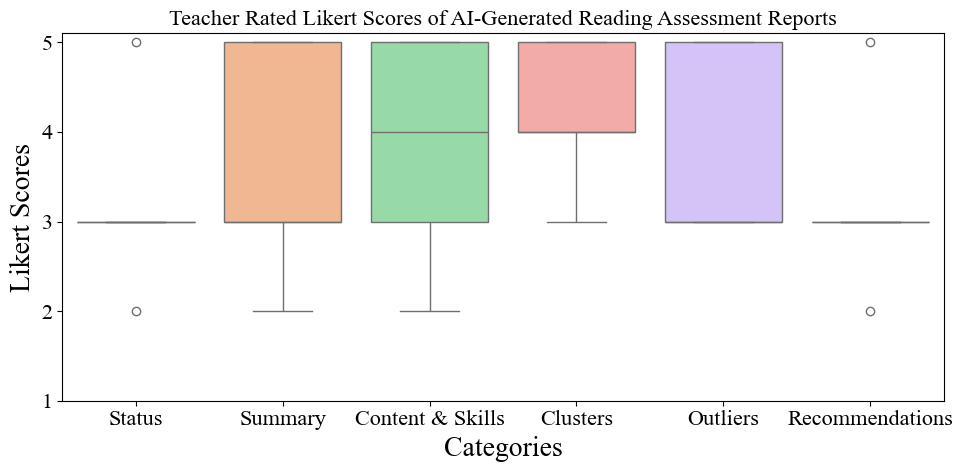

In [30]:
# Plot the boxplot for the average scores using Seaborn
plt.figure(figsize=(10, 5))

# Make the colors pastel
sns.set_palette("pastel")
sns.boxplot(data=likert_scores)

# Make the range from 1 to 5
plt.ylim(1, 5.1)

# Add title, x-axis label, and y-axis label
plt.title("Teacher Rated Likert Scores of AI-Generated Reading Assessment Reports")
plt.xlabel("Categories")
plt.ylabel("Likert Scores")
# plt.xticks(rotation=10)

# Save the plot
plt.tight_layout()
plt.savefig(CWD / 'data' / 'evals' / 'teacher_feedback_boxplot.png')

In [31]:
# Printout the averages
print(likert_scores.mean())
print(likert_scores.std())

Status              3.2
Summary             3.6
Content & Skills    3.8
Clusters            4.2
Outliers            3.8
Recommendations     3.2
dtype: float64
Status              1.095445
Summary             1.341641
Content & Skills    1.303840
Clusters            0.836660
Outliers            1.095445
Recommendations     1.095445
dtype: float64
